# Importing Libraries

In [1]:
import pandas as pd
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.shape 

(301, 9)

In [3]:
# Seeing Catagorical variables 
print(df["Seller_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


# Checking Missing values and null values 

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Droping "Car Name"

In [7]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# As we have "Year" attribute which is not useful but from that Year attribute we can derive another attribute which is "No of years" from 2020

## Calculating "No of year"from 2020 for that we need to create "Current year" as 2020

In [8]:
final_dataset["Current_year"]=2020

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
for i in final_dataset["Year"].values:
    final_dataset["no. of years"]=final_dataset["Current_year"]-final_dataset["Year"]

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no. of years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


### Droping "Years and Current year" attribute 

In [12]:
final_dataset.drop(["Year"],axis=1,inplace=True)

In [13]:
final_dataset.drop(["Current_year"],axis=1,inplace=True)

In [14]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Converting Catagorical Variables to Binary Variables

In [15]:
# For Fuel_tyoe
lst_Fuel=final_dataset["Fuel_Type"].value_counts().head(2).index
lst_Fuel=list(lst_Fuel)
lst_Fuel

['Petrol', 'Diesel']

In [16]:
import numpy as np
for fuel in lst_Fuel:
    final_dataset["Fuel_Type_"+fuel]=np.where(final_dataset["Fuel_Type"]==fuel,1,0)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years,Fuel_Type_Petrol,Fuel_Type_Diesel
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,1,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,1,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,1,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1


In [18]:
# For Seller_Type
lst_Seller=final_dataset["Seller_Type"].value_counts().head(1).index
lst_Seller=list(lst_Seller)
lst_Seller

['Dealer']

In [19]:
for seller in lst_Seller:
    final_dataset["Seller_Type_"+seller]=np.where(final_dataset["Seller_Type"]==seller,1,0)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type_Dealer
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,1,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,1,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,1,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,1


In [21]:
# For Transmission
lst_trans=final_dataset["Transmission"].value_counts().head(1).index
lst_trans=list(lst_trans)
lst_trans 

['Manual']

In [22]:
for trans in lst_trans:
    final_dataset["Transmission_"+ trans]=np.where(final_dataset["Transmission"]==trans,1,0)

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,1,0,1,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,1,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,1,0,1,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,1,0,1,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,1,1


In [24]:
# For Owner 
final_dataset["Owner"]= final_dataset["Owner"].astype(str)
lst_owner=final_dataset["Owner"].value_counts().head(2).index
lst_owner=list(lst_owner)
lst_owner

['0', '1']

In [25]:
for owner in lst_owner:
    df["Owner_"+owner]=np.where(final_dataset["Owner"]==owner,1,0)

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,1,0,1,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,1,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,1,0,1,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,1,0,1,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,1,1


## Correlation 

In [27]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,no. of years,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,-0.540571,0.552339,0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,-0.465244,0.473306,0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,-0.172874,0.172515,0.101419,-0.162510
no. of years,-0.236141,0.047584,0.524342,1.000000,0.059959,-0.064315,-0.039896,-0.000394
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,1.000000,-0.979648,-0.358321,0.091013
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,-0.979648,1.000000,0.350467,-0.098643
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.039896,-0.358321,0.350467,1.000000,-0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,0.091013,-0.098643,-0.063240,1.000000


<AxesSubplot:>

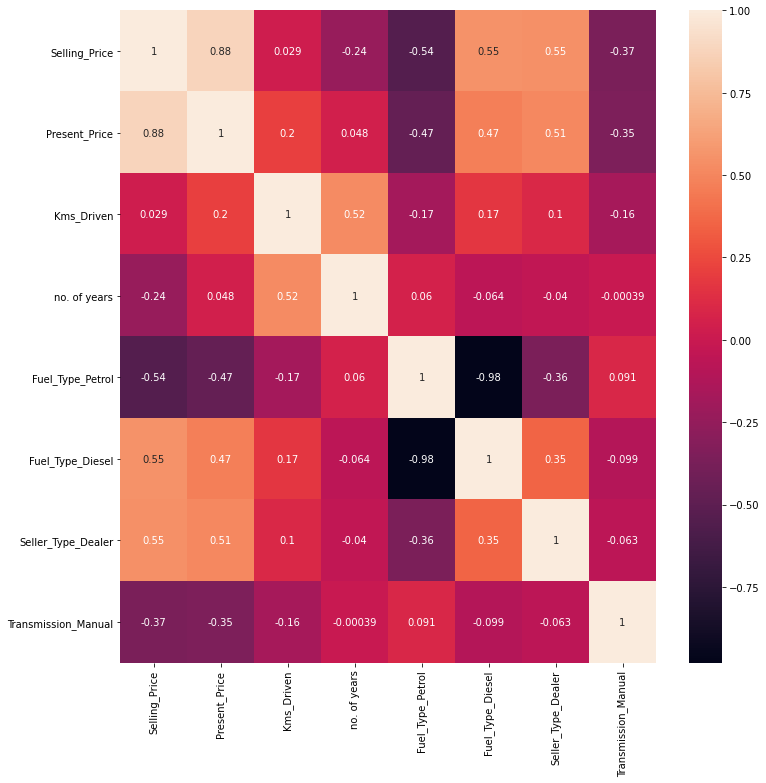

In [28]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
import seaborn as sns 
sns.heatmap(final_dataset.corr(),annot=True)

In [29]:
# Independant Features
X=final_dataset.iloc[:,[1,2,6,7,8,9,10,11]]
X.head()

,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Manual
0,5.59,27000,0,6,1,0,1,1
1,9.54,43000,0,7,0,1,1,1
2,9.85,6900,0,3,1,0,1,1
3,4.15,5200,0,9,1,0,1,1
4,6.87,42450,0,6,0,1,1,1


In [30]:
# Dependant Features 
y=final_dataset.iloc[:,[0]]
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


## For Features Selection we use Feature Importances

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
imp_features=ExtraTreesRegressor()
imp_features.fit(X,y)

<ipython-input-31-f579ecadd243>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  imp_features.fit(X,y)


ExtraTreesRegressor()

In [32]:
imp_features.feature_importances_

array([0.39060315, 0.04046615, 0.00136073, 0.07448507, 0.01949704,
       0.2221105 , 0.11726489, 0.13421247])

In [33]:
final_dataset.importances=pd.DataFrame(imp_features.feature_importances_,columns=["Importances"])
final_dataset.features=pd.DataFrame(X.columns,columns=["Features"])
after_concat= pd.concat([final_dataset.features,final_dataset.importances],axis=1)
after_concat.nlargest(8,"Importances")

<ipython-input-33-b9aaa1ea7f11>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final_dataset.importances=pd.DataFrame(imp_features.feature_importances_,columns=["Importances"])
<ipython-input-33-b9aaa1ea7f11>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final_dataset.features=pd.DataFrame(X.columns,columns=["Features"])


,Features,Importances
0,Present_Price,0.390603
5,Fuel_Type_Diesel,0.222111
7,Transmission_Manual,0.134212
6,Seller_Type_Dealer,0.117265
3,no. of years,0.074485
1,Kms_Driven,0.040466
4,Fuel_Type_Petrol,0.019497
2,Owner,0.001361


## Train test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [36]:
y_linearpred=linear.predict(X_test)

### Accuracy

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
print ("R2 is ", r2_score(y_test,y_linearpred))
#print ("Mean Sq error", mean_squared_error(y_test,y_linearpred))

R2 is  0.9144342972228519


# Hyperparameter Tuning on Random Forest Regressor
### RandomizesearchCV

In [40]:
from sklearn.ensemble import RandomForestRegressor
randregg=RandomForestRegressor()

### Creating a space for the parameters of Random Forest Regressor which will tune by RandomSearchCV 

In [41]:
rand_space={"n_estimators":[int(x) for x in np.linspace(start=100,stop=1200,num=12)],
           "max_features":["auto","sqrt"],
           "max_depth":[int(x) for x in np.linspace(start=5,stop=30,num=6)],
           "min_samples_split":[2,5,10,15,100],
           "min_samples_leaf":[1,2,5,10],
           "criterion" :["mse", "mae"]}
print(rand_space)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'criterion': ['mse', 'mae']}


### Searching the best parameters for Random Forest Regressor

In [42]:
from sklearn.model_selection import RandomizedSearchCV
Rand_search=RandomizedSearchCV(estimator=randregg,param_distributions=rand_space,cv=5,n_iter=100,
                               n_jobs=-1,verbose=2,random_state=100)

In [43]:
Rand_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished
/home/abhisek/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, verbose=2)

### The Best parameters are 

In [44]:
Rand_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

### Now fitting the model with best parameters 

In [45]:
Model=RandomForestRegressor(n_estimators=100,min_samples_split=5,min_samples_leaf=2,max_features="auto",
                           max_depth=10,criterion="mse")

In [46]:
Model.fit(X_train,y_train)

<ipython-input-46-ff85defc2b22>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [47]:
y_prediction=Model.predict(X_test)

## Accuracy Checking 

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.9484269882415484

### R2 is 95% that means the model is well fitted 

## Ploting Test vs Predict

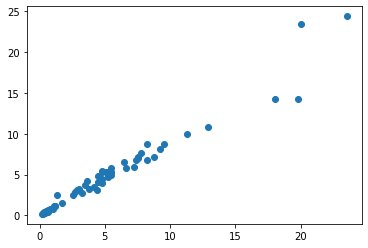

In [49]:
 plt.scatter(y_test,y_prediction)

## It is found that test and predict is linearly dependant that means the model accuracy is good

In [55]:
models=["Linear Regg","Random Forest Regg"]
scores=[r2_score(y_test,y_linearpred)
        ,r2_score(y_test,y_prediction)]

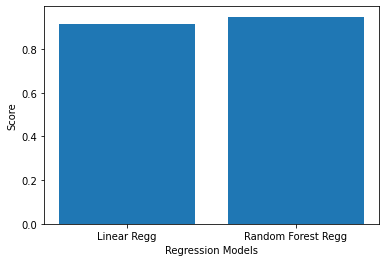

In [56]:
import matplotlib.pyplot as plt
plt.bar(models,scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

## Its nearly the same accuracy of Linear Regression and Random Forest Regressor